In [1]:
%reset -f
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import sebaba.ml as sbbml
import sebaba.utils as utils
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

In [3]:
pd.options.display.float_format = "{:.4f}".format

In [4]:
x = np.vstack([ 
    np.random.normal(0.25, 0.1, size = (50, 2)), 
    np.random.normal(0.50, 0.1, size = (50, 2)),
    np.random.normal(0.75, 0.1, size = (50, 2)),
    np.random.normal(0.10, 0.1, size = (50, 2))
    ])
y = np.hstack([[0] * 50, [1] * 50, [3] * 50, [4] * 50])

In [5]:
x_train, x_test, y_train, y_test = utils.split_train_test(x, y, prop_train = 80)

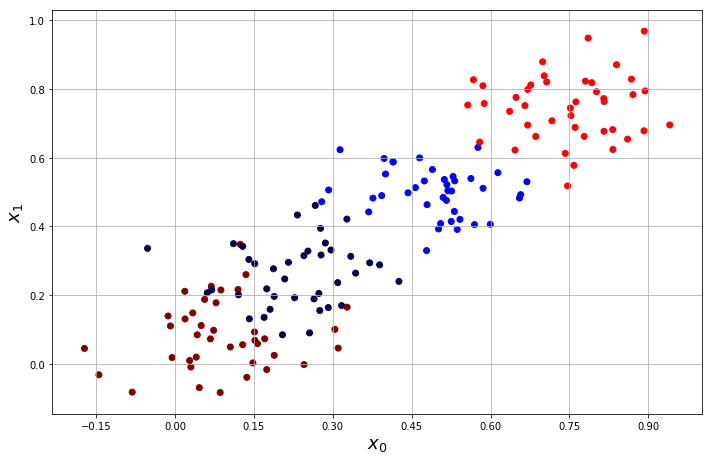

In [6]:
fig, ax = plt.subplots(figsize = (10.0, 6.5))
ax.scatter(x_train[:,0], x_train[:,1], c = y_train.flatten(), cmap = "seismic")
ax.set_xlabel("$x_0$", fontsize = 18)
ax.set_ylabel("$x_1$", fontsize = 18)
ax.xaxis.set_major_locator(tkr.MaxNLocator(integer = False))
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()

plt.show()

In [7]:
model = sbbml.KNNClassifier()
model.fit(x_train, y_train)

In [8]:
y_prime = model.predict(x_test, k = 3)
np.mean(y_test.flatten() == y_prime.flatten())

0.9

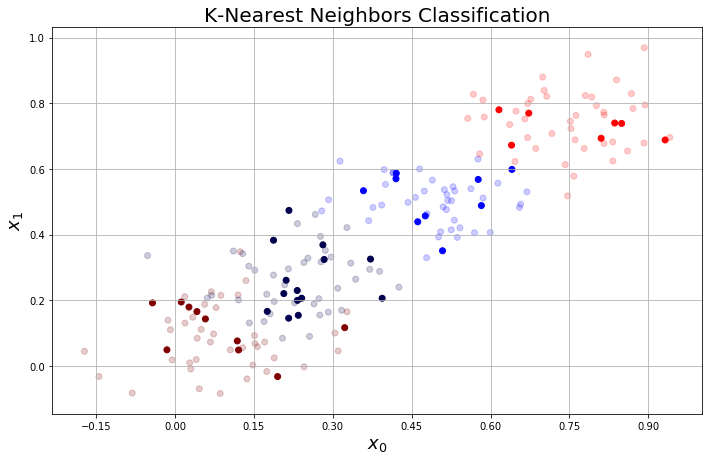

In [9]:
fig, ax = plt.subplots(figsize = (10.0, 6.5))
ax.scatter(x_train[:,0], x_train[:,1], alpha = 0.2, c = y_train.flatten(), cmap = "seismic")
ax.scatter(x_test[:,0], x_test[:,1], c = y_prime.flatten(), cmap = "seismic")
ax.set_title("K-Nearest Neighbors Classification", fontsize = 20)
ax.set_xlabel("$x_0$", fontsize = 18)
ax.set_ylabel("$x_1$", fontsize = 18)
ax.xaxis.set_major_locator(tkr.MaxNLocator(integer = False))
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()

plt.show()

In [10]:
data = pd.read_csv("data/ex1data.tsv", sep = "\t"); data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


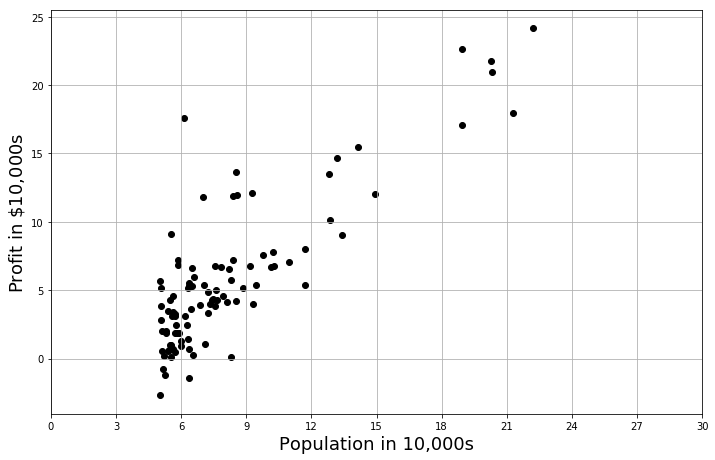

In [11]:
fig, ax = plt.subplots(figsize = (10.0, 6.5))
ax.scatter(data = data, x = "population", y = "profit", c = "k", marker = "o")
ax.set_ylabel("Profit in $\$$10,000s", fontsize = 18)
ax.set_xlabel("Population in 10,000s", fontsize = 18)
ax.xaxis.set_major_locator(tkr.MaxNLocator(integer = True))
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()

plt.xlim(0, 30)
plt.show()

In [12]:
x = data[["population"]].values
y = data[["profit"]].values

In [13]:
x_train, x_test, y_train, y_test = utils.split_train_test(x, y, prop_train = 80)

In [14]:
model = sbbml.KNNRegression()
model.fit(x_train, y_train)

In [15]:
y_prime = model.predict(x_test, k = 10)
utils.root_mean_squared_error(y_prime, y_test)

19.132788123835137

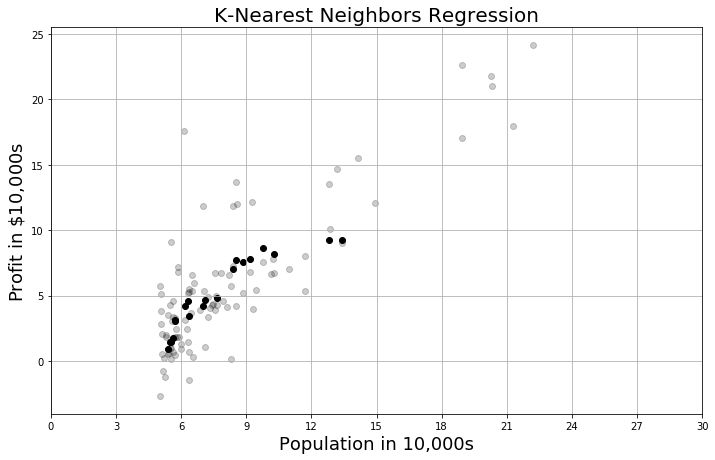

In [16]:
fig, ax = plt.subplots(figsize = (10.0, 6.5))
ax.scatter(data = data, x = "population", y = "profit", alpha = 0.2, c = "k", marker = "o")
ax.scatter(x_test, y_prime, c = "k")
ax.set_title("K-Nearest Neighbors Regression", fontsize = 20)
ax.set_ylabel("Profit in $\$$10,000s", fontsize = 18)
ax.set_xlabel("Population in 10,000s", fontsize = 18)
ax.xaxis.set_major_locator(tkr.MaxNLocator(integer = True))
ax.margins(0.05)
ax.axis("tight")
ax.grid(True)
fig.tight_layout()

plt.xlim(0, 30)
plt.show()